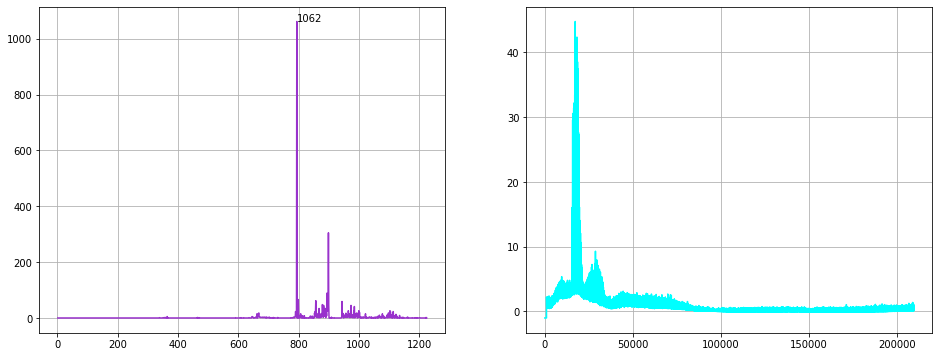

In [3]:
import numpy as np
from IPython.display import clear_output
from Game import *
from Agent import *
from matplotlib import pyplot as plt
import time

game = Game(288, 512)
game.myBird.reset_play_mode()
AIBird = DeepQNetwork()
epoch = 1
scores = []
losses = []
dx, dy = calculate_state(game.myBird, game.tubes)
s = np.array([dx, dy])
init_time = time.time()
max_time = 3600 * 2
while True:
    a = AIBird.choose_action(s)
    dx, dy = game.ai_run(a, epoch)
    s_ = np.array([dx, dy])
    if not game.game_over_flag:
        r = 1
        AIBird.save_memory(s, a, r, s_)
        loss = AIBird.learn()
        losses.append(loss)
        s = s_
    else:
        r = -10
        AIBird.save_memory(s, a, r, s_)
        loss = AIBird.learn()
        losses.append(loss)
        scores.append(game.score)
        game.partial_init()
        game.myBird.reset_play_mode()
        dx, dy = calculate_state(game.myBird, game.tubes)
        s = np.array([dx, dy])
        epoch += 1
        clear_output()
        plt.figure(figsize=(16, 6))
        plt.subplot(121)
        plt.grid()
        plt.plot([i+1 for i in range(epoch-1)], scores, c='#9932CC')
        plt.text(np.argmax(scores) + 1, np.max(scores), str(int(np.max(scores))))
        plt.subplot(122)
        plt.grid()
        plt.plot(losses, c='#00FFFF')
        plt.show()
    n_time = time.time()
    if n_time - init_time >= max_time:
        pygame.quit()
        break